# Including additional variables to the whytehawk data

In [3]:
#Import the required packages

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

import tarfile
import urllib

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
#from statsmodels.graphics.gofplots import qqplot
import glob
import os
from IPython.display import Image
pd.options.display.float_format = '{:.4f}'.format

In [4]:
#import whytehawk data
os.chdir("C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data")
cycle_15_post= pd.read_csv('cycle_15_post.csv')
cycle_15_post=pd.read_csv('cycle_15_post.csv')

In [7]:
#df head
cycle_15_post.head()

,rates_authority__geocode,rates_authority__name,location_code,rates_code,occupier_name,occupation_status,status_date,address_no,address_street,address_town,...,floor_area,rental_valuation,rates_valuation,employee_count,employee_pay,revenue,occupation_data,Unit Postcode,Postcode District,Postcode Sector
0,E07000223,Adur,8096023000,190066840200,NaN,True,2017-04-01 00:00:00+00:00,GOODS YARD ENTRANCE NORTH OF BROOKLANDS,WESTERN ROAD,LANCING,...,144.0000,2500.0000,1260.0000,1.5000,36160.0000,6166.3031,True,BN15 8RR,BN15 8,BN15
1,E07000223,Adur,10001656000,671085590166,NaN,True,2017-04-01 00:00:00+00:00,RIVERSIDE STORAGE SHOREHAM CEMENT WORKS,SHOREHAM ROAD,STEYNING,...,1500.0000,7500.0000,3780.0000,16.0000,385712.0000,64232.3240,True,BN44 3TX,BN44 3,BN44
2,E07000223,Adur,9513908000,671085594893,NaN,True,2017-04-01 00:00:00+00:00,DUDMAN AGGREGATES LTD SECONDARY AGGREGATE PLANT,SHOREHAM ROAD,STEYNING,...,992.5906,55000.0000,27720.0000,27.5000,662942.0000,123401.5697,True,BN44 3TX,BN44 3,BN44
3,E07000223,Adur,10152317000,8010135011000,NaN,True,2011-11-04 00:00:00+00:00,11,ANCHOR CLOSE,SHOREHAM-BY-SEA,...,4.0000,3600.0000,1814.4000,0.0000,0.0000,1825.1797,True,BN43 5BZ,BN43 5,BN43
4,E07000223,Adur,5189155,801028013000E,DIVA SIGNS LTD,True,2003-11-03 00:00:00+00:00,130,BEACH GREEN,SHOREHAM-BY-SEA,...,27.5200,3400.0000,1713.6000,1.5000,36160.0000,549.1084,True,BN43 5YA,BN43 5,BN43


In [8]:
# Adding postcode columns
#cycle_15_post= cycle_15_raw
#cycle_15_post['Unit Postcode']=cycle_15_raw['pc__pcs']
#cycle_15_post['Postcode District']=cycle_15_raw['pc__pcs'].str[:6]
#cycle_15_post['Postcode Sector']=cycle_15_raw['pc__pcs'].str[:5]
cycle_15_post['Postcode Zone']=cycle_15_post['Unit Postcode'].str[:-1]

cycle_15_post.head()

,rates_authority__geocode,rates_authority__name,location_code,rates_code,occupier_name,occupation_status,status_date,address_no,address_street,address_town,...,rental_valuation,rates_valuation,employee_count,employee_pay,revenue,occupation_data,Unit Postcode,Postcode District,Postcode Sector,Postcode Zone
0,E07000223,Adur,8096023000,190066840200,NaN,True,2017-04-01 00:00:00+00:00,GOODS YARD ENTRANCE NORTH OF BROOKLANDS,WESTERN ROAD,LANCING,...,2500.0000,1260.0000,1.5000,36160.0000,6166.3031,True,BN15 8RR,BN15 8,BN15,BN15 8R
1,E07000223,Adur,10001656000,671085590166,NaN,True,2017-04-01 00:00:00+00:00,RIVERSIDE STORAGE SHOREHAM CEMENT WORKS,SHOREHAM ROAD,STEYNING,...,7500.0000,3780.0000,16.0000,385712.0000,64232.3240,True,BN44 3TX,BN44 3,BN44,BN44 3T
2,E07000223,Adur,9513908000,671085594893,NaN,True,2017-04-01 00:00:00+00:00,DUDMAN AGGREGATES LTD SECONDARY AGGREGATE PLANT,SHOREHAM ROAD,STEYNING,...,55000.0000,27720.0000,27.5000,662942.0000,123401.5697,True,BN44 3TX,BN44 3,BN44,BN44 3T
3,E07000223,Adur,10152317000,8010135011000,NaN,True,2011-11-04 00:00:00+00:00,11,ANCHOR CLOSE,SHOREHAM-BY-SEA,...,3600.0000,1814.4000,0.0000,0.0000,1825.1797,True,BN43 5BZ,BN43 5,BN43,BN43 5B
4,E07000223,Adur,5189155,801028013000E,DIVA SIGNS LTD,True,2003-11-03 00:00:00+00:00,130,BEACH GREEN,SHOREHAM-BY-SEA,...,3400.0000,1713.6000,1.5000,36160.0000,549.1084,True,BN43 5YA,BN43 5,BN43,BN43 5Y


In [7]:
#view column postcode zone
cycle_15_post['Postcode Zone']

0          BN15 8R
1          BN44 3T
2          BN44 3T
3          BN43 5B
4          BN43 5Y
            ...   
1954512    YO30 1Y
1954513     YO3 9X
1954514    YO31 8J
1954515     YO1 9T
1954516     YO1 9T
Name: Postcode Zone, Length: 1954517, dtype: object

In [8]:
#total floorspace per unit postcode with full data
final_groups_with_zeros=cycle_15_post.groupby(['Postcode Zone','category__grouped_by__description'], dropna=False)['floor_area'].agg(['sum']).unstack(fill_value=0).stack()

In [9]:
#reindex
final_groups_with_zeros = final_groups_with_zeros.reset_index()

In [10]:
#head
final_groups_with_zeros

,Postcode Zone,category__grouped_by__description,sum
0,AL1 1B,Agricultural General,0.0000
1,AL1 1B,Industrial General,0.0000
2,AL1 1B,Industrial Light,0.0000
3,AL1 1B,Leisure 4/ 5 Star Hotels,0.0000
4,AL1 1B,Leisure Amusement & Entertainment Centres,0.0000
...,...,...,...
2368245,YO8 9U,Retail Other Superstores/ Retail Warehouses,0.0000
2368246,YO8 9U,Retail Restaurants & Cafes,0.0000
2368247,YO8 9U,Warehouse & Distribution,0.0000
2368248,YO8 9U,Warehousing Large Scale and High Bay,0.0000


In [11]:
#replace NANs with unknown
final_groups_with_zeros.fillna("Unknown", inplace=True)

In [12]:
#head
final_groups_with_zeros

,Postcode Zone,category__grouped_by__description,sum
0,AL1 1B,Agricultural General,0.0000
1,AL1 1B,Industrial General,0.0000
2,AL1 1B,Industrial Light,0.0000
3,AL1 1B,Leisure 4/ 5 Star Hotels,0.0000
4,AL1 1B,Leisure Amusement & Entertainment Centres,0.0000
...,...,...,...
2368245,YO8 9U,Retail Other Superstores/ Retail Warehouses,0.0000
2368246,YO8 9U,Retail Restaurants & Cafes,0.0000
2368247,YO8 9U,Warehouse & Distribution,0.0000
2368248,YO8 9U,Warehousing Large Scale and High Bay,0.0000


## Formatting table

In [14]:
#see unique variables
final_groups_with_zeros['category__grouped_by__description'].unique()

array(['Agricultural General', 'Industrial General', 'Industrial Light',
       'Leisure 4/ 5 Star Hotels',
       'Leisure Amusement & Entertainment Centres',
       'Leisure Budget Hotels', 'Leisure Cinemas',
       'Leisure Cultural Attractions', 'Leisure General Hotels (3 star)',
       'Leisure Periodic Use', 'Leisure Sports centres and Private Clubs',
       'Office Business Park', 'Office General',
       'Office IT / Data Centres', 'Office Serviced Office',
       'Other Commercial', 'Other Public',
       'Retail Financial & Professional Services',
       'Retail Food Superstores', 'Retail High Street',
       'Retail Other Superstores/ Retail Warehouses',
       'Retail Restaurants & Cafes', 'Warehouse & Distribution',
       'Warehousing  Large Scale and High Bay', 'Unknown'], dtype=object)

In [15]:
#count unique variables
final_groups_with_zeros['category__grouped_by__description'].nunique()

25

In [16]:
#pivot table so has sum of commercial property types in columns
table = pd.pivot_table(final_groups_with_zeros, values='sum', index=['Postcode Zone'],
                    columns=["category__grouped_by__description"])

In [17]:
#Add a totals row
table['Total'] = table.sum(axis=1)
#Remove unit postcodes that have a total floorspace 100 or below
table = table[~(table['Total'] <= 100)] 

In [18]:
#delete total coloumn
del table['Total']

In [19]:
#view df
table.head()

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1123.3900,0.0000,664.1500,0.0000,0.0000,0.0000
AL1 1D,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,...,2.0000,182.1697,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AL1 1E,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,8.0000,102.6000,0.0000,0.0000,928.8100,0.0000,608.5656,0.0000,0.0000,0.0000
AL1 1H,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21.7861,64.4000,...,0.0000,494.4812,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AL1 1J,0.0000,2080.7500,0.0000,0.0000,995.5000,0.0000,0.0000,227.6063,0.0000,0.0000,...,0.0000,2.0000,0.0000,0.0000,182.1900,0.0000,0.0000,0.0000,0.0000,0.0000


In [20]:
table

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1123.3900,0.0000,664.1500,0.0000,0.0000,0.0000
AL1 1D,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,...,2.0000,182.1697,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AL1 1E,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,8.0000,102.6000,0.0000,0.0000,928.8100,0.0000,608.5656,0.0000,0.0000,0.0000
AL1 1H,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21.7861,64.4000,...,0.0000,494.4812,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AL1 1J,0.0000,2080.7500,0.0000,0.0000,995.5000,0.0000,0.0000,227.6063,0.0000,0.0000,...,0.0000,2.0000,0.0000,0.0000,182.1900,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YO8 9P,0.0000,1360.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,90.5903,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2221.1400
YO8 9R,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,134.4623,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
YO8 9S,0.0000,453.4800,0.0000,0.0000,0.0000,0.0000,0.0000,193.8468,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
#calculate percentage floorspace
table_percentage = table.div(table.sum(axis=1), axis=0)

In [22]:
#table shape
table_percentage.shape

(89368, 25)

In [23]:
#descriptive stats
table_percentage.describe()

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay
count,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,...,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000,89368.0000
mean,0.0008,0.1876,0.0313,0.0000,0.0127,0.0034,0.0000,0.0126,0.0013,0.0077,...,0.0219,0.2209,0.0049,0.0084,0.1412,0.0520,0.0592,0.0000,0.0020,0.0493
std,0.0136,0.2901,0.1152,0.0011,0.0698,0.0246,0.0003,0.0947,0.0206,0.0593,...,0.0946,0.3084,0.0326,0.0572,0.2209,0.1565,0.1389,0.0005,0.0309,0.1543
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0560,0.0000,0.0000,0.0325,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.2927,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.3397,0.0000,0.0000,0.1921,0.0000,0.0522,0.0000,0.0000,0.0009
max,1.0000,1.0000,1.0000,0.2899,1.0000,1.0000,0.0730,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1410,1.0000,1.0000


Text(0.5, 1.0, 'Table Percentage')

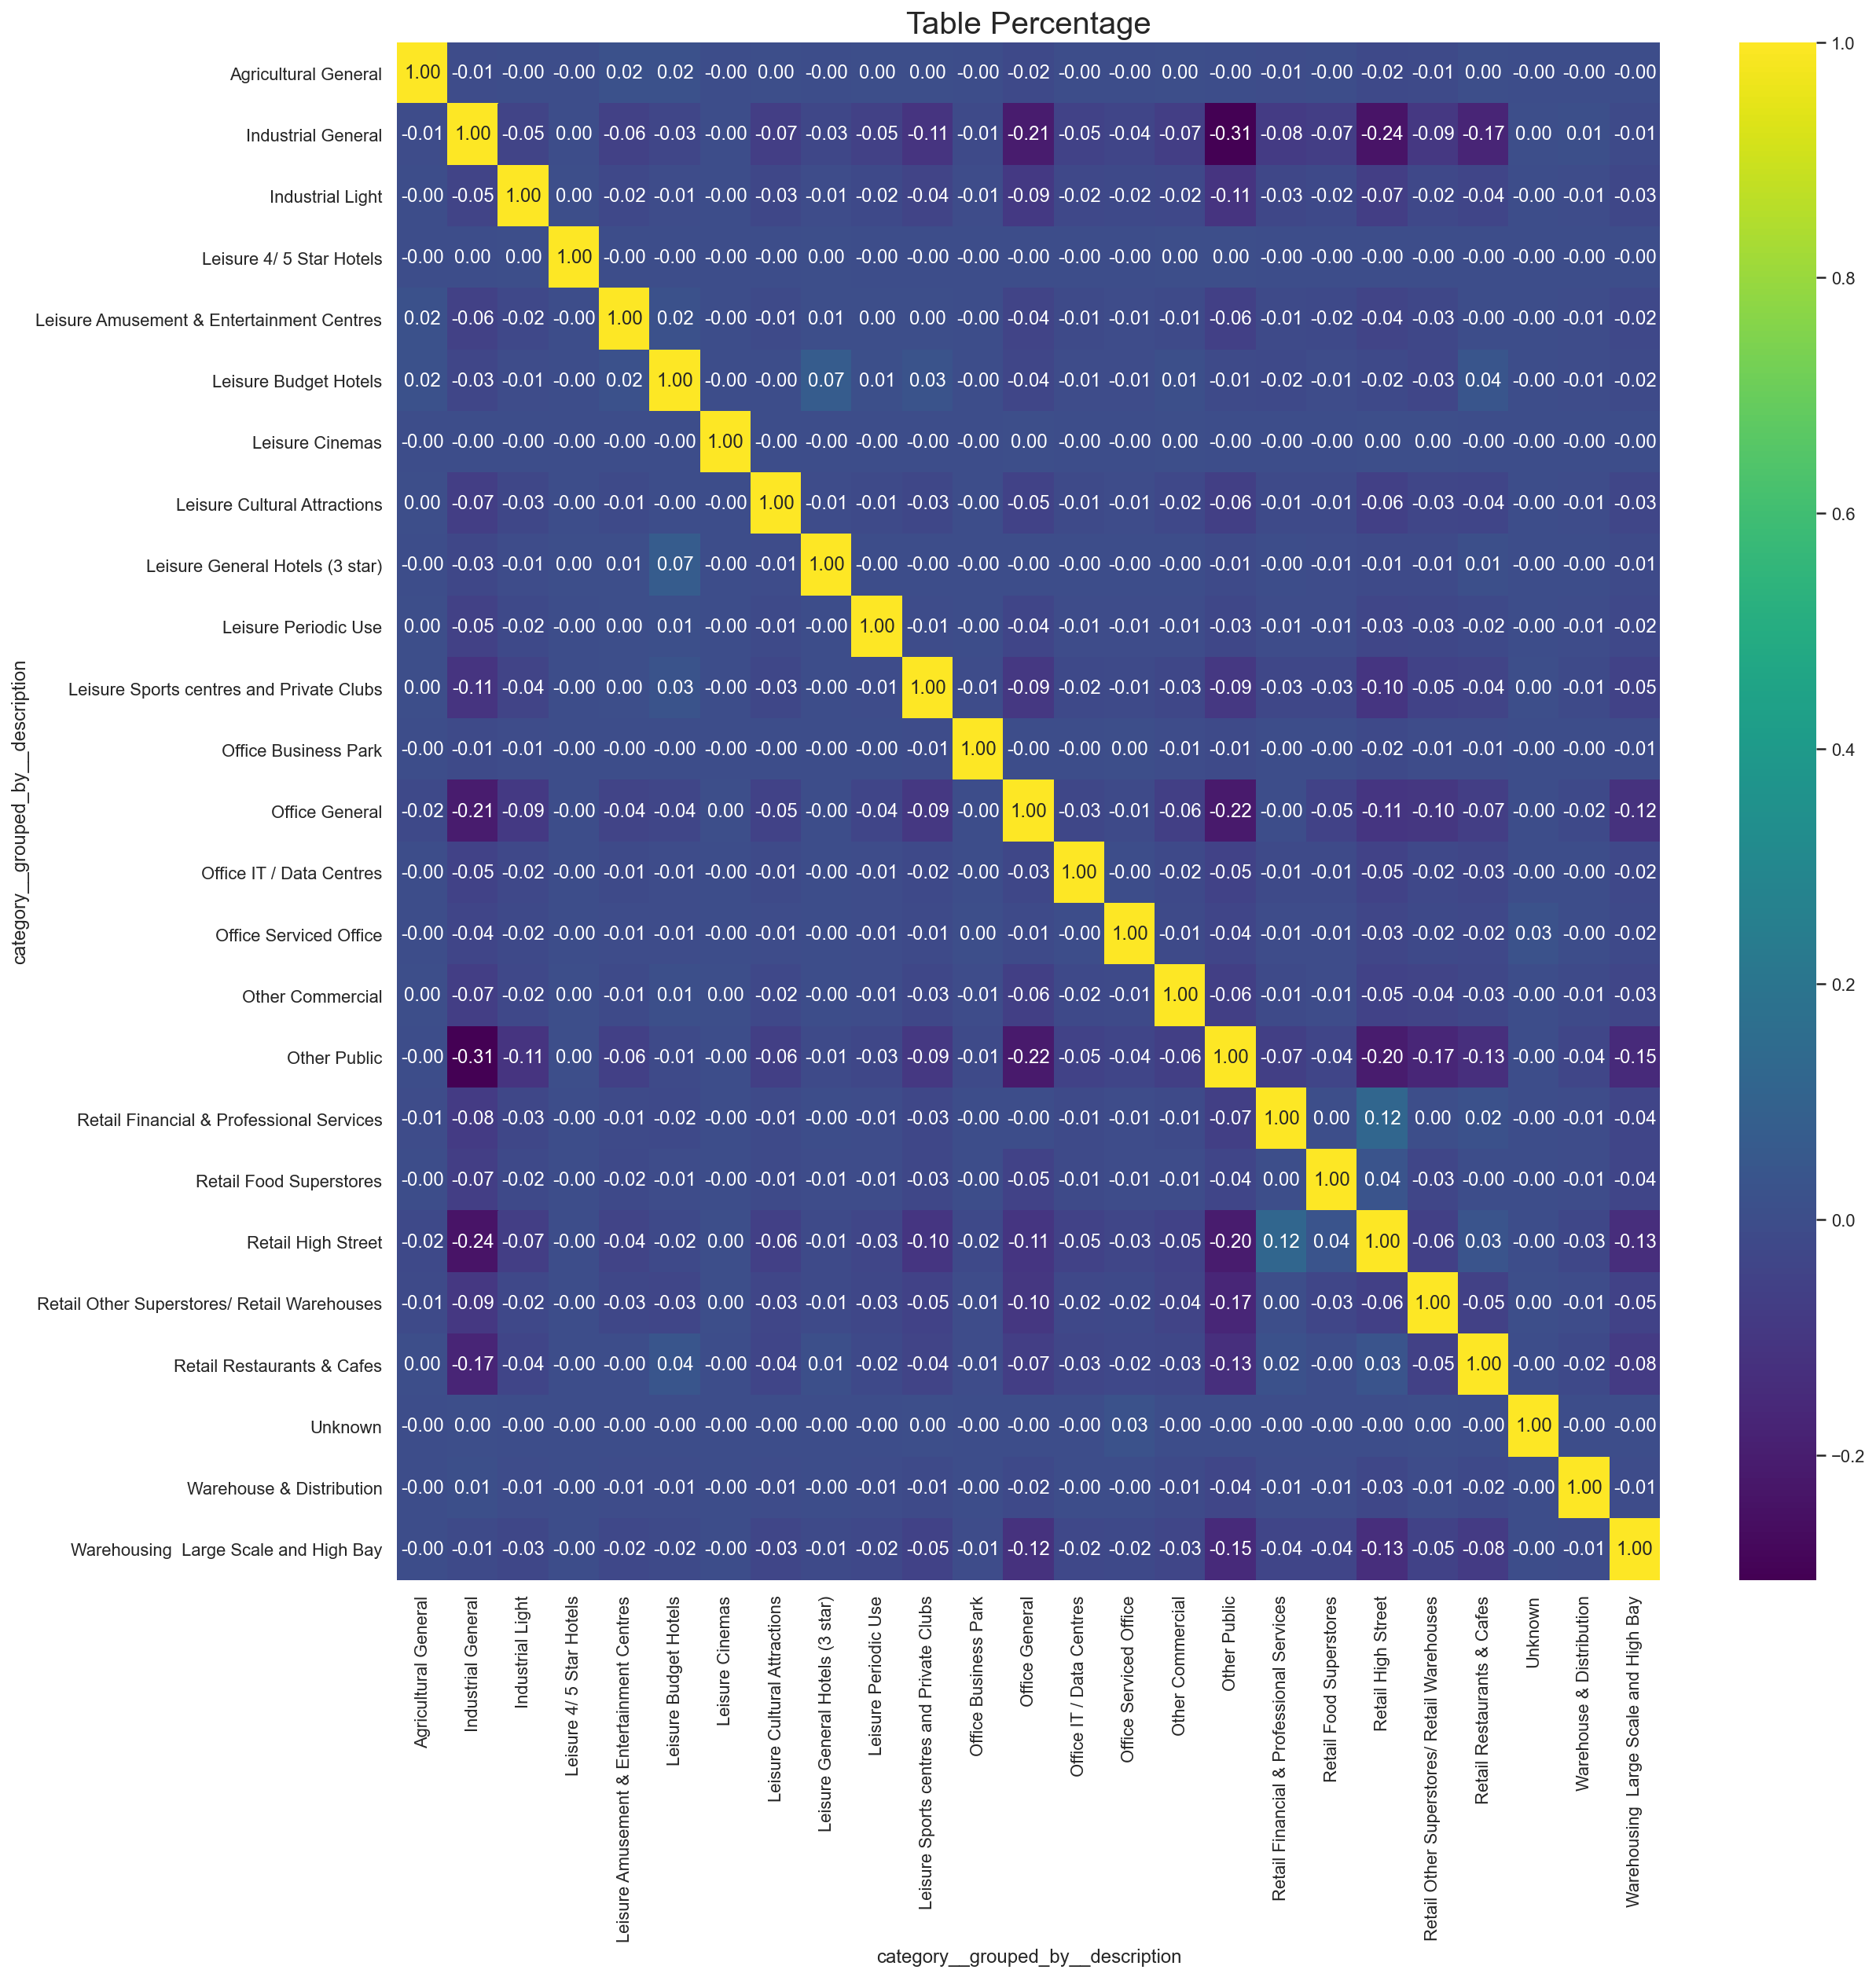

In [26]:
# set figure size
plt.figure(figsize=(18,18))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(table_percentage.corr(), annot=True, cmap='viridis', fmt=".2f");
plt.title('Table Percentage', fontsize=20)

Text(0.5, 1.0, 'Table')

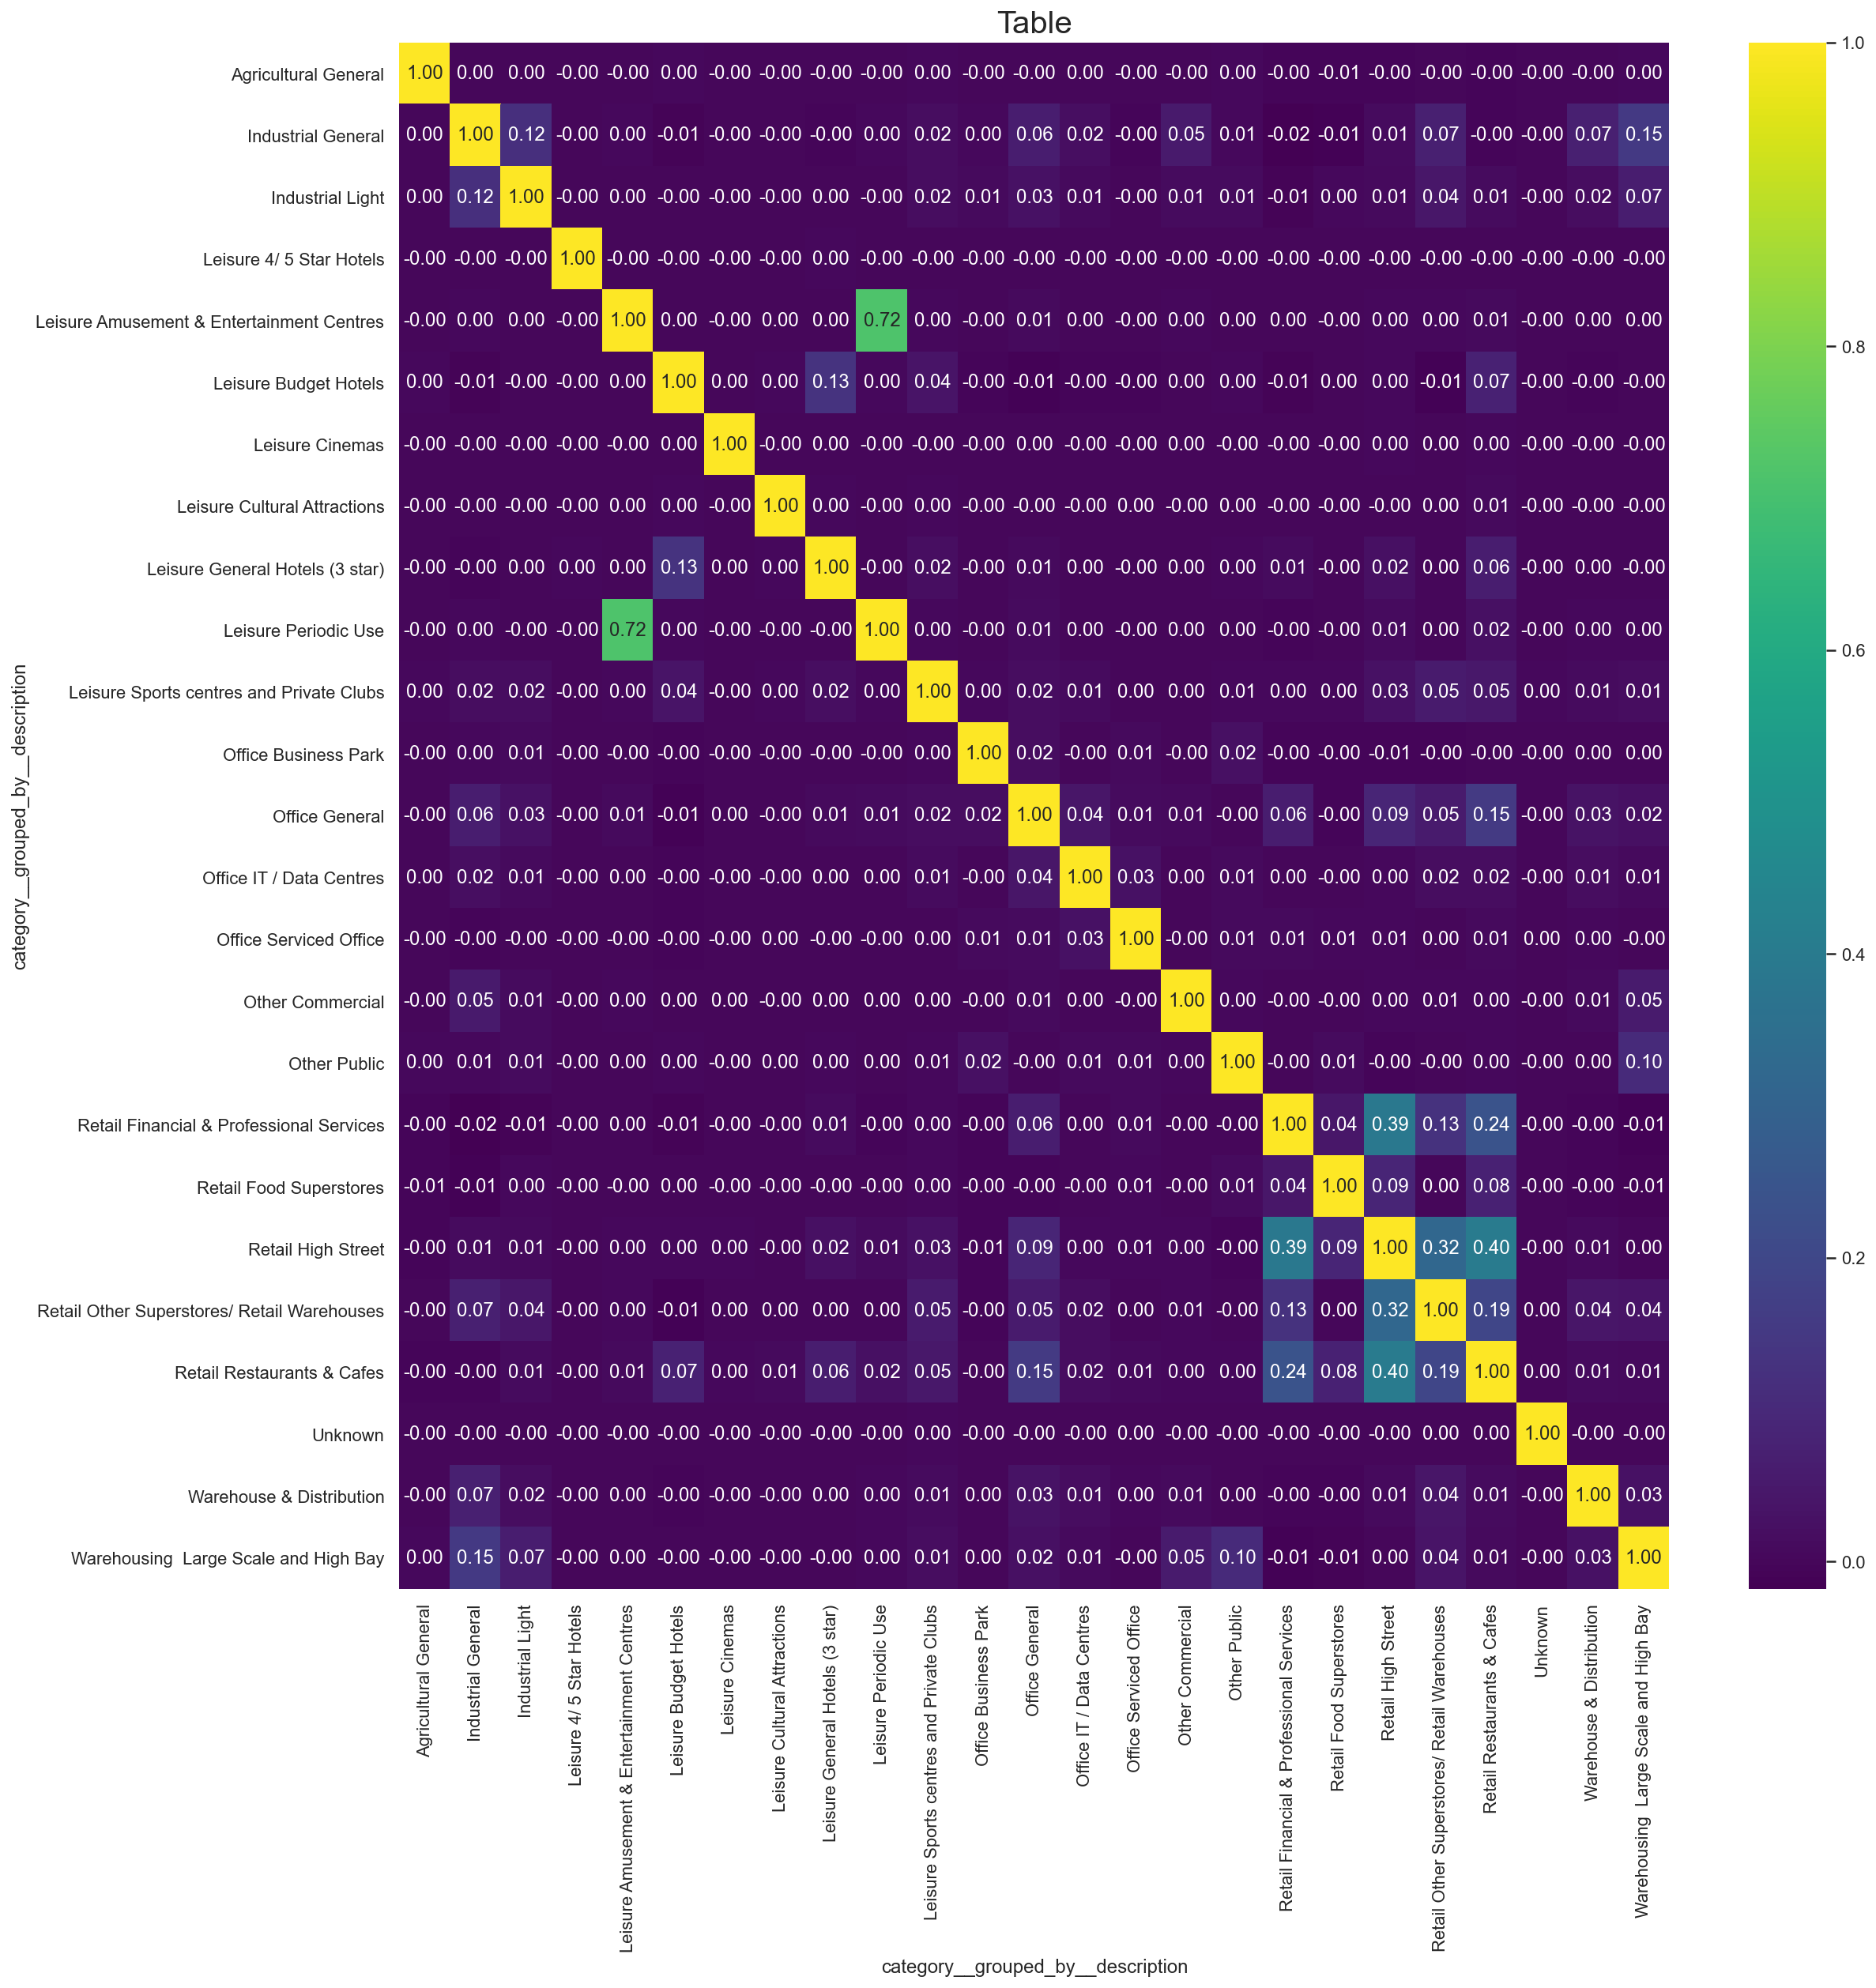

In [27]:
# set figure size
plt.figure(figsize=(18,18))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(table.corr(), annot=True, cmap='viridis', fmt=".2f");
plt.title('Table', fontsize=20)

## Creating and adding the commerial diversity Index based on the simpson's diversity index

In [164]:
#copy table
table_tot = table.copy()

In [165]:
#create total
table_tot['total'] = table_tot.sum(axis = 1) 

In [166]:
#create the denominator where n = the total amount of floorspace of a particular commerical category and
#N = the total amountof floorspace of all commerical category
table_tot['N(N-1)']= table_tot['total']*(table_tot['total']-1)

In [167]:
table_tot

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay,total,N(N-1)
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1123.3900,0.0000,664.1500,0.0000,0.0000,0.0000,2176.0700,4733104.5749
AL1 1D,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,186.1697,34472.9777
AL1 1E,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,928.8100,0.0000,608.5656,0.0000,0.0000,0.0000,3251.7256,10570467.5410
AL1 1H,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21.7861,64.4000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2113.1673,4463362.6794
AL1 1J,0.0000,2080.7500,0.0000,0.0000,995.5000,0.0000,0.0000,227.6063,0.0000,0.0000,...,0.0000,0.0000,182.1900,0.0000,0.0000,0.0000,0.0000,0.0000,5299.8363,28082965.2391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YO8 9P,0.0000,1360.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2221.1400,3671.7303,13477931.4118
YO8 9R,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,136.4623,18485.5094
YO8 9S,0.0000,453.4800,0.0000,0.0000,0.0000,0.0000,0.0000,193.8468,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,647.3268,418384.6647


In [168]:
#apply function a(a-1) to all values to create numerator value n(n-1)
mod_table2 = table.apply(lambda a: a*(a-1))

In [169]:
#sum all value is postcode zones
mod_table2['n*(n-1)'] = mod_table2.sum(axis = 1) 

In [170]:
#show df
mod_table2

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay,n*(n-1)
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,1260881.7021,-0.0000,440431.0725,-0.0000,-0.0000,-0.0000,1851879.8055
AL1 1D,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,2.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,33003.6203,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,33007.6203
AL1 1E,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,10424.1600,-0.0000,-0.0000,861759.2061,-0.0000,369743.5031,-0.0000,-0.0000,-0.0000,3812393.1817
AL1 1H,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,452.8468,4082.9600,...,244017.1614,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,2595576.7181
AL1 1J,-0.0000,4327439.8125,-0.0000,-0.0000,990024.7500,-0.0000,-0.0000,51577.0330,-0.0000,-0.0000,...,2.0000,-0.0000,-0.0000,33011.0061,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,7052514.4517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YO8 9P,-0.0000,1848240.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,8116.0059,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,4931241.7596,6787597.7655
YO8 9R,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,2.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,17945.6600,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,17947.6600
YO8 9S,-0.0000,205190.6304,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,37382.7367,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,242573.3671


In [171]:
#create diversity ndex by divinding n*(n-1) by N*(N-1)
mod_table2['diversity'] = mod_table2['n*(n-1)']/table_tot['N(N-1)']

In [172]:
#add it to the df table percenatge
table_percentage['diversity'] = mod_table2['diversity']

In [173]:
#show df
table_percentage

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay,diversity
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.5162,0.0000,0.3052,0.0000,0.0000,0.0000,0.3913
AL1 1D,0.0000,0.0000,0.0000,0.0000,0.0000,0.0107,0.0000,0.0000,0.0000,0.0000,...,0.9785,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9575
AL1 1E,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0316,0.0000,0.0000,0.2856,0.0000,0.1872,0.0000,0.0000,0.0000,0.3607
AL1 1H,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0103,0.0305,...,0.2340,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5815
AL1 1J,0.0000,0.3926,0.0000,0.0000,0.1878,0.0000,0.0000,0.0429,0.0000,0.0000,...,0.0004,0.0000,0.0000,0.0344,0.0000,0.0000,0.0000,0.0000,0.0000,0.2511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YO8 9P,0.0000,0.3704,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0247,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6049,0.5036
YO8 9R,0.0000,0.0000,0.0000,0.0000,0.0000,0.0147,0.0000,0.0000,0.0000,0.0000,...,0.9853,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9709
YO8 9S,0.0000,0.7005,0.0000,0.0000,0.0000,0.0000,0.0000,0.2995,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5798


In [174]:
#1 minus diverity score so that the value index also ranges between 0 and 1, but now, the greater the value, the greater the sample diversity.
table_percentage['diversity'] = 1-table_percentage['diversity'] 

In [176]:
table_percentage

category__grouped_by__description,Agricultural General,Industrial General,Industrial Light,Leisure 4/ 5 Star Hotels,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cinemas,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Periodic Use,...,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Unknown,Warehouse & Distribution,Warehousing Large Scale and High Bay,diversity
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.5162,0.0000,0.3052,0.0000,0.0000,0.0000,0.6087
AL1 1D,0.0000,0.0000,0.0000,0.0000,0.0000,0.0107,0.0000,0.0000,0.0000,0.0000,...,0.9785,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0425
AL1 1E,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0316,0.0000,0.0000,0.2856,0.0000,0.1872,0.0000,0.0000,0.0000,0.6393
AL1 1H,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0103,0.0305,...,0.2340,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4185
AL1 1J,0.0000,0.3926,0.0000,0.0000,0.1878,0.0000,0.0000,0.0429,0.0000,0.0000,...,0.0004,0.0000,0.0000,0.0344,0.0000,0.0000,0.0000,0.0000,0.0000,0.7489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YO8 9P,0.0000,0.3704,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0247,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6049,0.4964
YO8 9R,0.0000,0.0000,0.0000,0.0000,0.0000,0.0147,0.0000,0.0000,0.0000,0.0000,...,0.9853,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0291
YO8 9S,0.0000,0.7005,0.0000,0.0000,0.0000,0.0000,0.0000,0.2995,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4202


## Adding crime point data for england and wales for 2020

In [ ]:
# Import and concatenate crime data

def multi_file(input_dir):
    dir_list = os.listdir(input_dir)
    df_list = []
    for d in dir_list:
        file_list = os.listdir(input_dir + "/" + d)
        for f in file_list:
            print(d + "/" + f)
            df = pd.read_csv(input_dir + "/" + d + "/" + f)
            df_list.append(df)
    df_master = pd.concat(df_list)
    
    return df_master
            
crime_dataframe = multi_file(std_file_name('C:\\Users\\medshesa\\Documents\\Whytehawk Project\\Crime data\\f9bff4acc5c5eae33d3c30e0b3bc7767a155a390'))

In [ ]:
#shape of crime data
crime_dataframe.shape

In [ ]:
#view crime table
crime_dataframe

In [ ]:
#read as crime data as geodataframe
gdf2 = gpd.GeoDataFrame(crime_dataframe, geometry=gpd.points_from_xy(x=crime_dataframe.Longitude, y=crime_dataframe.Latitude))

In [ ]:
#change crs to 27700 (British National Grid -- United Kingdom Ordnance Survey)

gdf2 = gdf2.set_crs("EPSG:4326")

gdf3 = gdf2.to_crs("EPSG:27700")

gdf3

In [ ]:
#join crime data to postcodes data

polys = postcodes_dissolved.copy()
points = gdf3.copy()

#dfsjoin = gpd.sjoin(polys, points) #Spatial join Points to polygons


#dfpivot = pd.pivot_table(dfsjoin,index='PolyID',columns='Food',aggfunc={'Food':len})
#dfpivot.columns = dfpivot.columns.droplevel()

#dfpolynew = polys.merge(dfpivot, how='left', on='PolyID')

dfsjoin = gpd.sjoin(polys, points)

In [ ]:
#see new merged table
dfsjoin

In [ ]:
#drop unnecessary columns
smalldfsjoin = dfsjoin.drop(['index_right','LSOA code','POSTCODE','PC_AREA','Month','Crime ID', 'Reported by','Falls within', 'Location','LSOA name', 'Last outcome category', 'Context'], axis=1)

In [ ]:
#see table
smalldfsjoin

In [ ]:
#pivot table so to calculate the total amount of crime
dfpivot = pd.pivot_table(smalldfsjoin, index='UPP',columns='Crime type',aggfunc={'Crime type':len})
dfpivot.columns = dfpivot.columns.droplevel()
dfpolynew = polys.merge(dfpivot, how='left', on='UPP')
#sum to get total crime
dfpivot["sum"] = dfpivot.sum(axis=1)

In [ ]:
#filter for UPP and sum
dfpivot = dfpivot.filter(['UPP','sum'], axis=1)


In [ ]:
#merge with polygons
dfpolynew = polys.merge(dfpivot, how='left', on='UPP')
dfpolynew = dfpolynew.rename(columns={'postcode zones':'Postcode Zone'})
dfpolynew = dfpolynew.set_index('Postcode Zone')

In [ ]:
dfpolynew

In [ ]:
#merge with table_percentage
crime_table = table_percentage.merge(dfpolynew, left_index=True, right_index=True)

In [ ]:
#How many postcode zone are nan (have no crimes)
crime_table['sum'].isna().sum()

In [ ]:
#rename
crime_table = crime_table.rename(columns={'sum':'Crime Count'})

### Generating crime per business

In [10]:
cycle_15_post

,rates_authority__geocode,rates_authority__name,location_code,rates_code,occupier_name,occupation_status,status_date,address_no,address_street,address_town,...,rental_valuation,rates_valuation,employee_count,employee_pay,revenue,occupation_data,Unit Postcode,Postcode District,Postcode Sector,Postcode Zone
0,E07000223,Adur,8096023000,190066840200,NaN,True,2017-04-01 00:00:00+00:00,GOODS YARD ENTRANCE NORTH OF BROOKLANDS,WESTERN ROAD,LANCING,...,2500.0000,1260.0000,1.5000,36160.0000,6166.3031,True,BN15 8RR,BN15 8,BN15,BN15 8R
1,E07000223,Adur,10001656000,671085590166,NaN,True,2017-04-01 00:00:00+00:00,RIVERSIDE STORAGE SHOREHAM CEMENT WORKS,SHOREHAM ROAD,STEYNING,...,7500.0000,3780.0000,16.0000,385712.0000,64232.3240,True,BN44 3TX,BN44 3,BN44,BN44 3T
2,E07000223,Adur,9513908000,671085594893,NaN,True,2017-04-01 00:00:00+00:00,DUDMAN AGGREGATES LTD SECONDARY AGGREGATE PLANT,SHOREHAM ROAD,STEYNING,...,55000.0000,27720.0000,27.5000,662942.0000,123401.5697,True,BN44 3TX,BN44 3,BN44,BN44 3T
3,E07000223,Adur,10152317000,8010135011000,NaN,True,2011-11-04 00:00:00+00:00,11,ANCHOR CLOSE,SHOREHAM-BY-SEA,...,3600.0000,1814.4000,0.0000,0.0000,1825.1797,True,BN43 5BZ,BN43 5,BN43,BN43 5B
4,E07000223,Adur,5189155,801028013000E,DIVA SIGNS LTD,True,2003-11-03 00:00:00+00:00,130,BEACH GREEN,SHOREHAM-BY-SEA,...,3400.0000,1713.6000,1.5000,36160.0000,549.1084,True,BN43 5YA,BN43 5,BN43,BN43 5Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954512,E06000014,York,5132012000,N11709009000,NaN,True,2017-04-01 00:00:00+00:00,T-MOBILE SITE NO. 95423 ON ELECTRIC PYLON XCP014,STRIPE LANE,YORK,...,8800.0000,4435.2000,nan,nan,20871.3186,True,YO30 1YJ,YO30 1,YO30,YO30 1Y
1954513,E06000014,York,168123108,RY011809108480,NaN,True,2017-04-01 00:00:00+00:00,SEWAGE DISPOSAL WORKS,NaN,YORK,...,1950.0000,982.8000,nan,nan,102.6107,True,YO3 9XS,YO3 9X,YO3 9,YO3 9X
1954514,E06000014,York,10428131000,T2741-13032018,NaN,True,2017-04-01 00:00:00+00:00,BOLT PRO TEM LTD YORK NETWORK,HAXBY ROAD,YORK,...,16000.0000,8064.0000,nan,nan,10433.9211,True,YO31 8JX,YO31 8,YO31,YO31 8J
1954515,E06000014,York,12186154000,YCC2009308,F5 Presentations Limited,True,2019-05-01 00:00:00+00:00,GND FLR 75,WALMGATE,YORK,...,12750.0000,5747.1000,5.0000,148155.0000,105455.8650,True,YO1 9TZ,YO1 9T,YO1 9,YO1 9T


In [11]:
#count number of businesses per postcode zone
cycle_15_count = cycle_15_post.groupby('Postcode Zone').count()

In [12]:
cycle_15_count

,rates_authority__geocode,rates_authority__name,location_code,rates_code,occupier_name,occupation_status,status_date,address_no,address_street,address_town,...,floor_area,rental_valuation,rates_valuation,employee_count,employee_pay,revenue,occupation_data,Unit Postcode,Postcode District,Postcode Sector
Postcode Zone,,,,,,,,,,,,,,,,,,,,,
AL1 1B,26,26,26,26,25,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
AL1 1D,3,3,3,3,2,3,3,3,3,3,...,3,3,3,1,1,3,3,3,3,3
AL1 1E,34,34,34,34,25,34,34,34,34,34,...,34,34,34,31,31,34,34,34,34,34
AL1 1H,6,6,6,6,6,6,6,6,6,6,...,6,6,6,5,5,6,6,6,6,6
AL1 1J,20,20,20,20,18,20,20,20,20,20,...,20,20,20,19,19,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YO8 9P,9,9,9,9,6,9,9,9,9,9,...,9,9,9,7,7,9,9,9,9,9
YO8 9R,4,4,4,4,2,4,4,4,4,4,...,4,4,4,1,1,4,4,4,4,4
YO8 9S,3,3,3,3,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [13]:
#filter out index and unit postcode
business_count = cycle_15_count.filter(['index','Unit Postcode'], axis=1)

In [14]:
#rename
business_count = business_count.rename({'Unit Postcode':'Business_Count'}, axis=1)

In [15]:
business_count

,Business_Count
Postcode Zone,
AL1 1B,26
AL1 1D,3
AL1 1E,34
AL1 1H,6
AL1 1J,20
...,...
YO8 9P,9
YO8 9R,4
YO8 9S,3


In [ ]:
#merding tables and dividing crime by business to get crime_per_business
crime_per_business = business_count.merge(crime_table, how='left', on='Postcode Zone')
crime_per_business['crime_per_business'] = crime_per_business['Crime Count']/crime_per_business['Business_Count']

## Adding accessibility score

In [ ]:
#import ramp accessibility data
os.chdir("C:/Users/medshesa/Documents/Whytehawk Project/Accessibility data")
access_data_bus = pd.read_csv('JobAccessibilityObs_bus.csv', index_col=1)
access_data_rail = pd.read_csv('JobAccessibilityObs_rail.csv', index_col=1)
access_data_road = pd.read_csv('JobAccessibilityObs_road.csv', index_col=1)

In [ ]:
#merge datasets
access4 = pd.merge(access_data_bus, access_data_rail, left_index=True, right_index=True)
access_data = pd.merge(access4, access_data_road, left_index=True, right_index=True)

In [ ]:
#rename variables
access_data = access_data.rename({'data_x': 'Bus', 'data_y': 'Rail', 'data': 'Road'}, axis=1)

In [ ]:
#import LSOA to postcode lookup
os.chdir("C:/Users/medshesa/Documents/Whytehawk Project/Additional factors")
LSOA= pd.read_csv('PCD_OA_LSOA_MSOA_LAD_NOV19_UK_LU.csv', encoding='latin-1')

In [ ]:
LSOA

In [ ]:
#merge acces data with LSOA uplook to obtain postcodes
merged_access_table = access_data.merge(LSOA, left_on='areakey', right_on='msoa11cd')

In [ ]:
#filter key variables
new_merged_access_table = merged_access_table.filter(['pcds','Bus','Rail', 'Road'], axis=1)

In [ ]:
new_merged_access_table

In [ ]:
#create postcode zones and make it an index
new_merged_access_table = new_merged_access_table.rename(columns={'pcds': 'postcode zones'})
new_merged_access_table['postcode zones'] = new_merged_access_table['postcode zones'].str[:-1]
new_merged_access_table = new_merged_access_table.set_index('postcode zones')

In [ ]:
#test an examples
new_merged_access_table.loc['AL1 1B']

In [ ]:
#use mean to combine all values under the same postcode zone
new_merged_access_table2 = new_merged_access_table.reset_index().groupby('postcode zones').mean()

In [ ]:
#save as accesbility table
new_merged_access_table2.to_csv("C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data/accessibility table all.csv", index=True, encoding='utf-8-sig')